In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'c:\\Users\\acer\\Desktop'

In [3]:
#collecting data
data=pd.read_csv(r'c:\Users\acer\Downloads\iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.drop(columns=["Id","Species"],inplace=True)

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


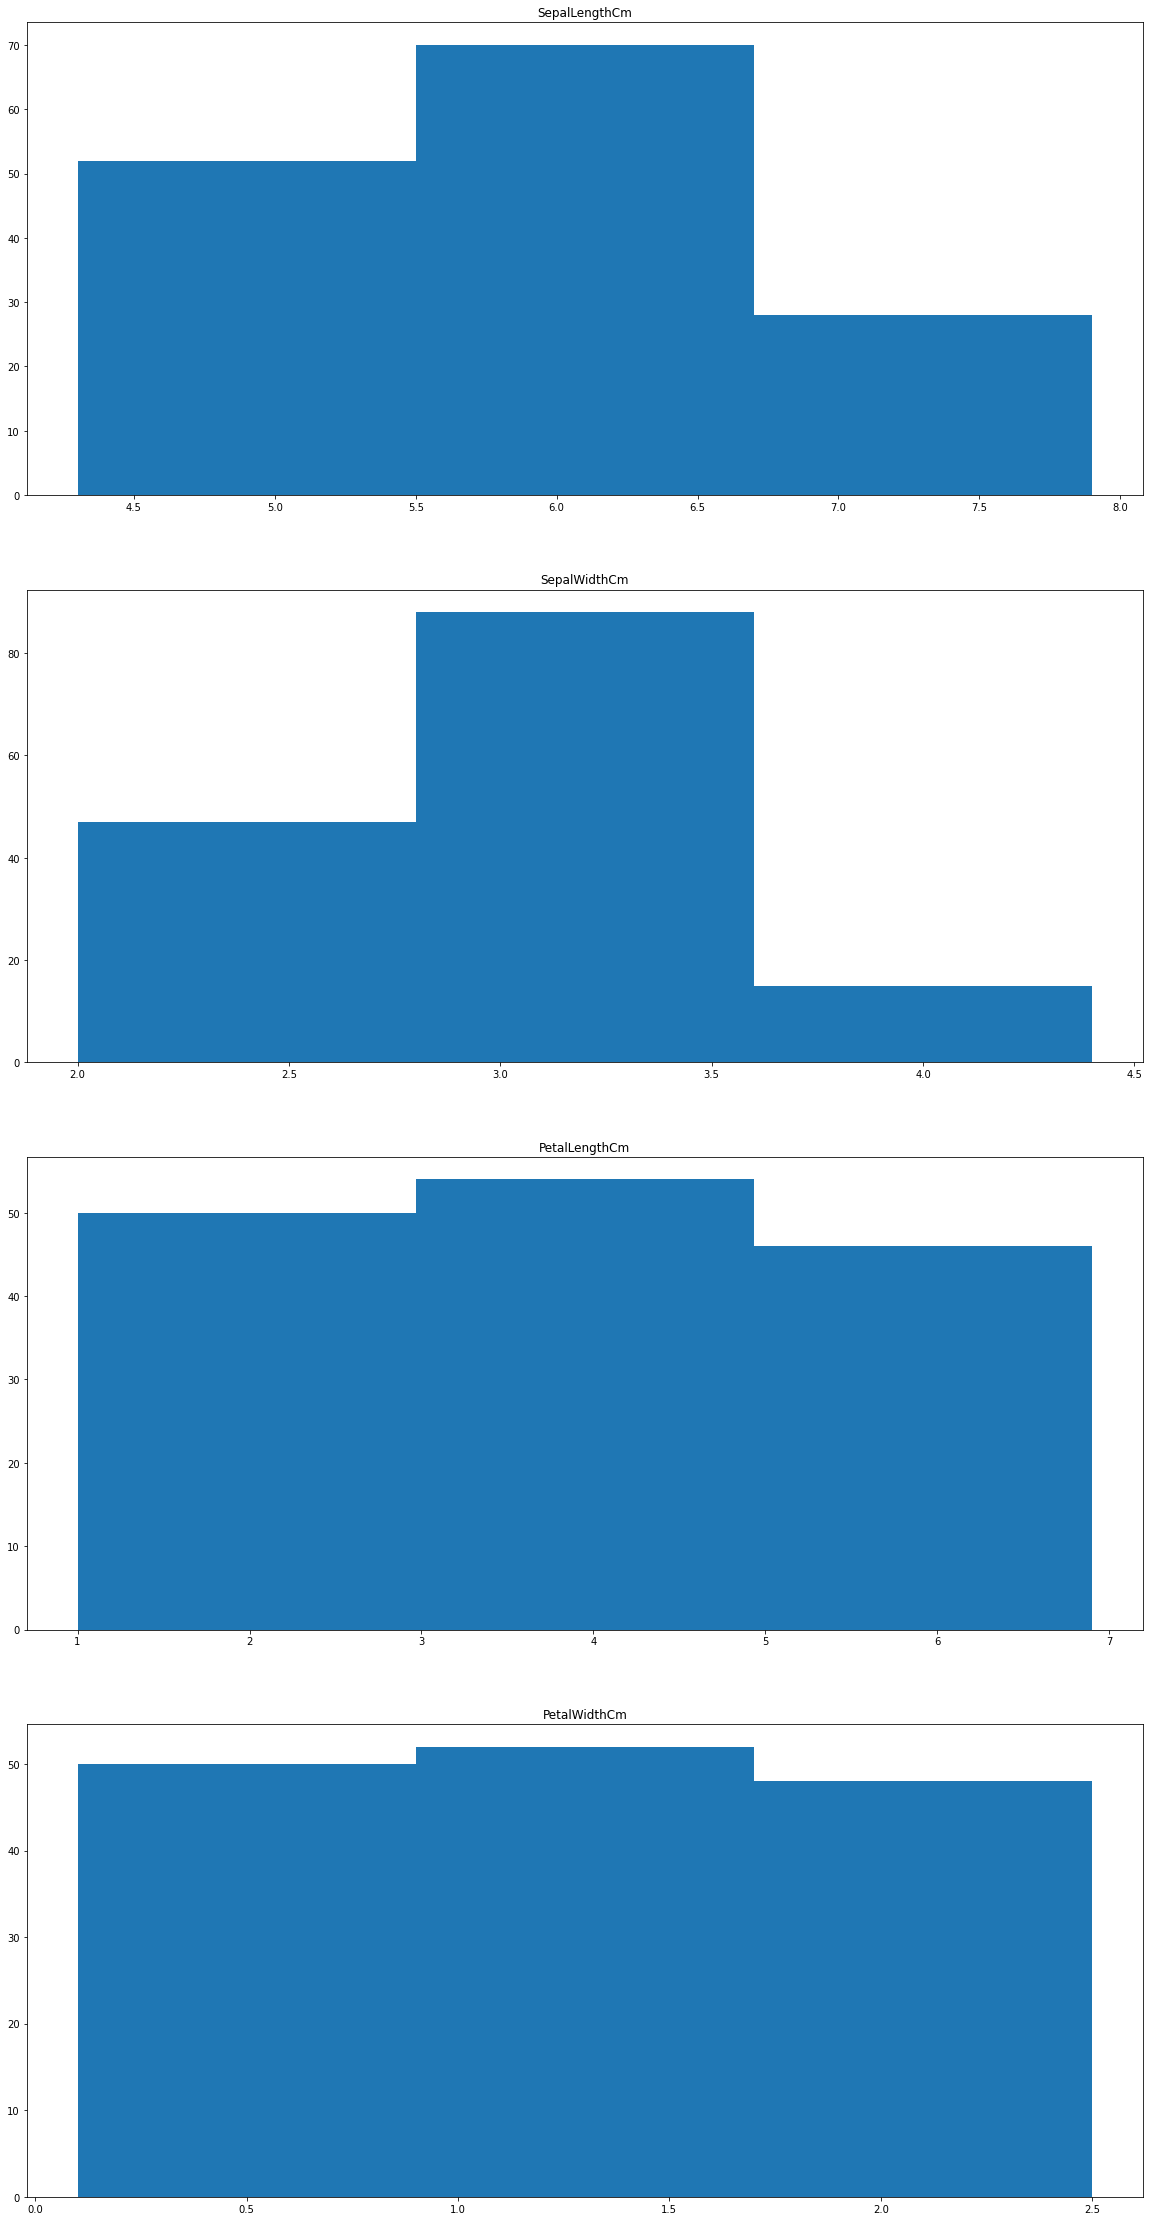

In [7]:
fig,axes=plt.subplots(4,1,figsize=(20,40))

for col,axis in zip(data.columns,axes):
    axis.hist(data[[col]],bins=3)
    axis.set_title(f'{col}')

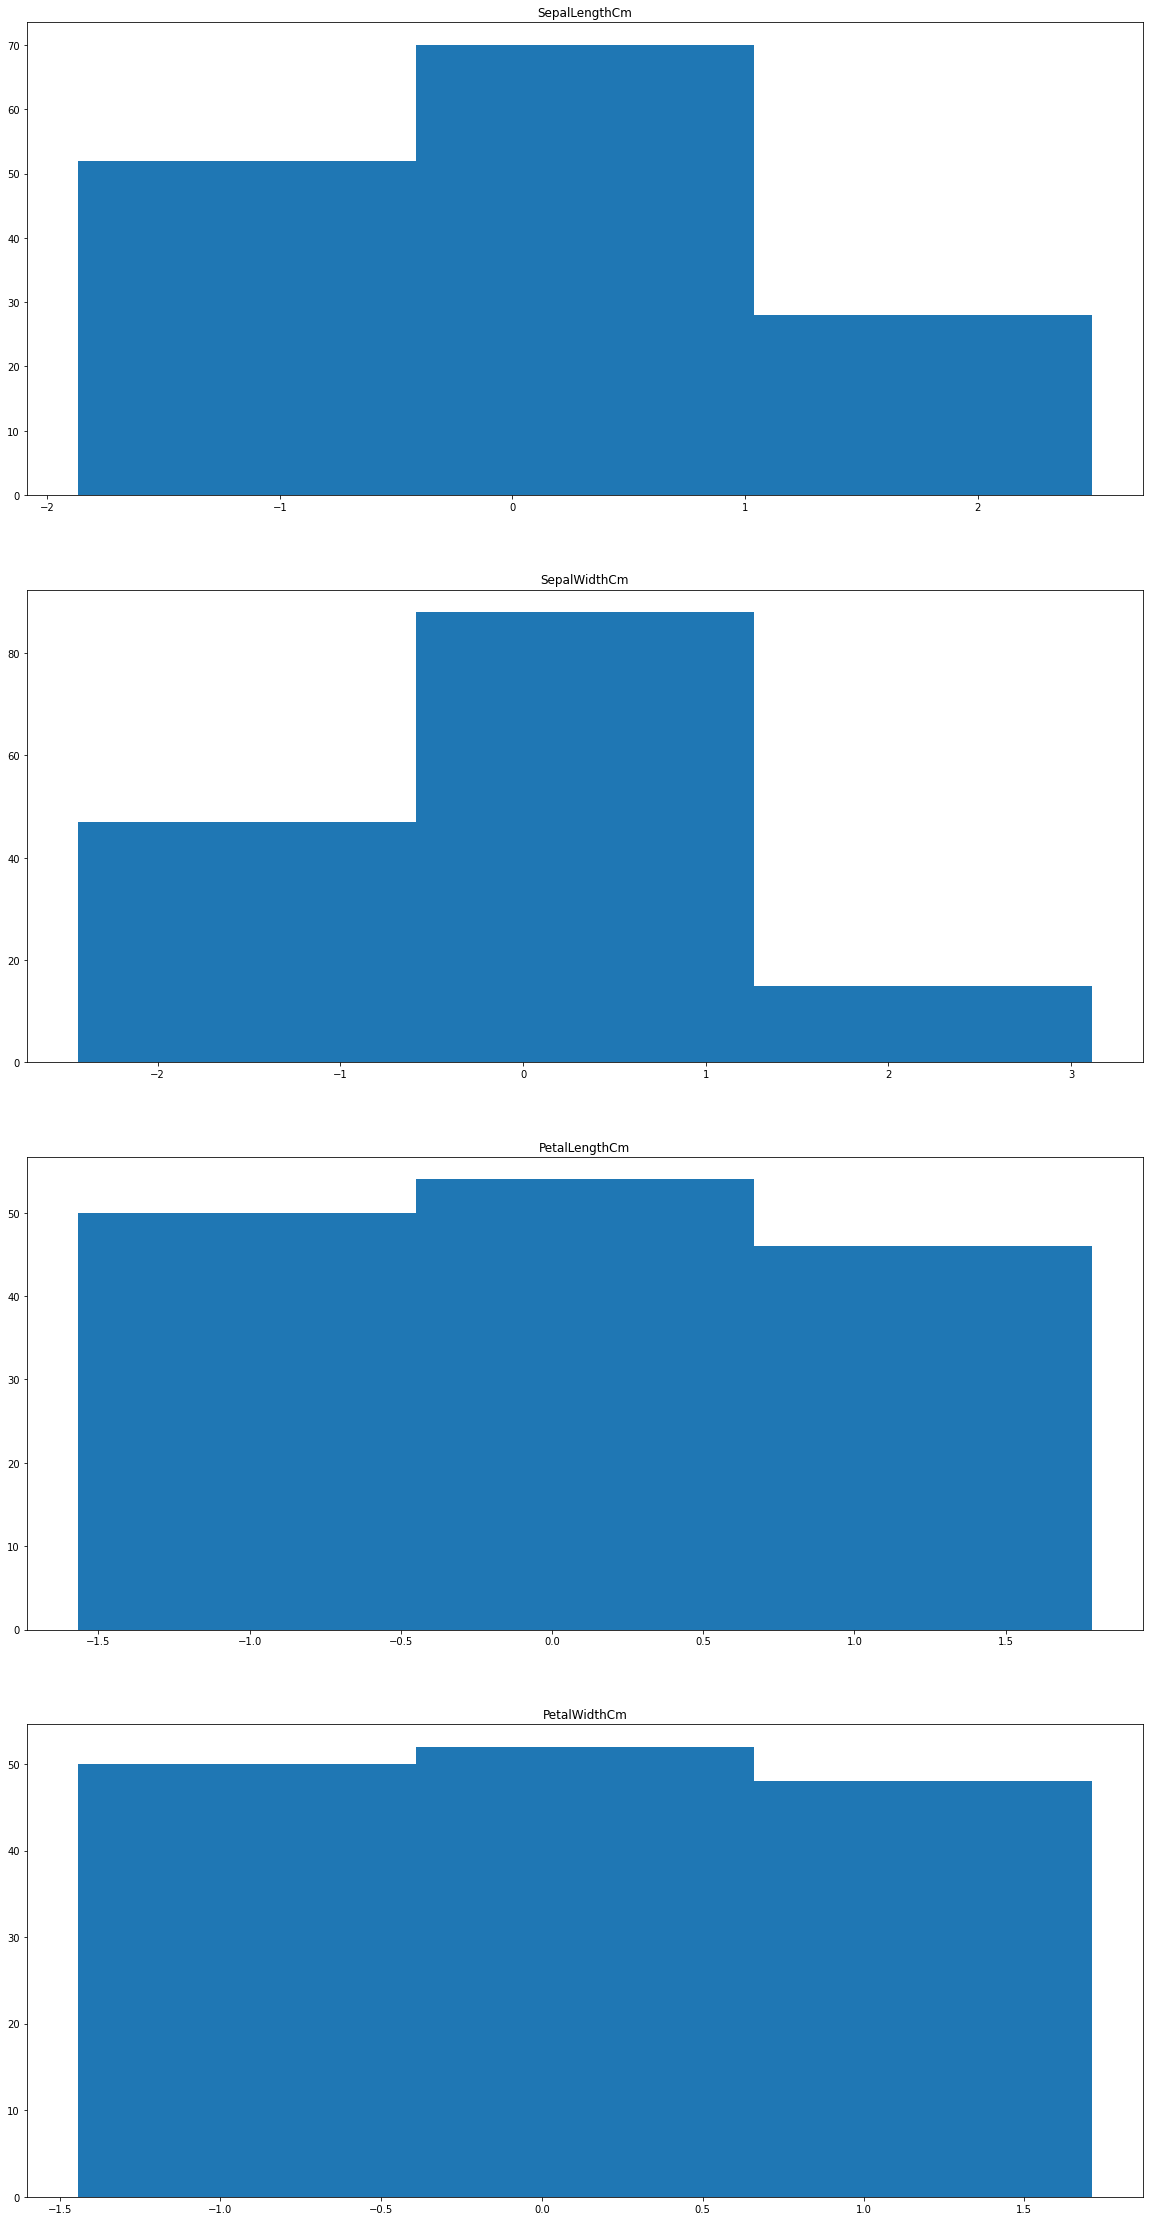

In [8]:
#data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()
scaledx=scaler.fit_transform(data)
scaledx[:,0]

fig1,axes1=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes1):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

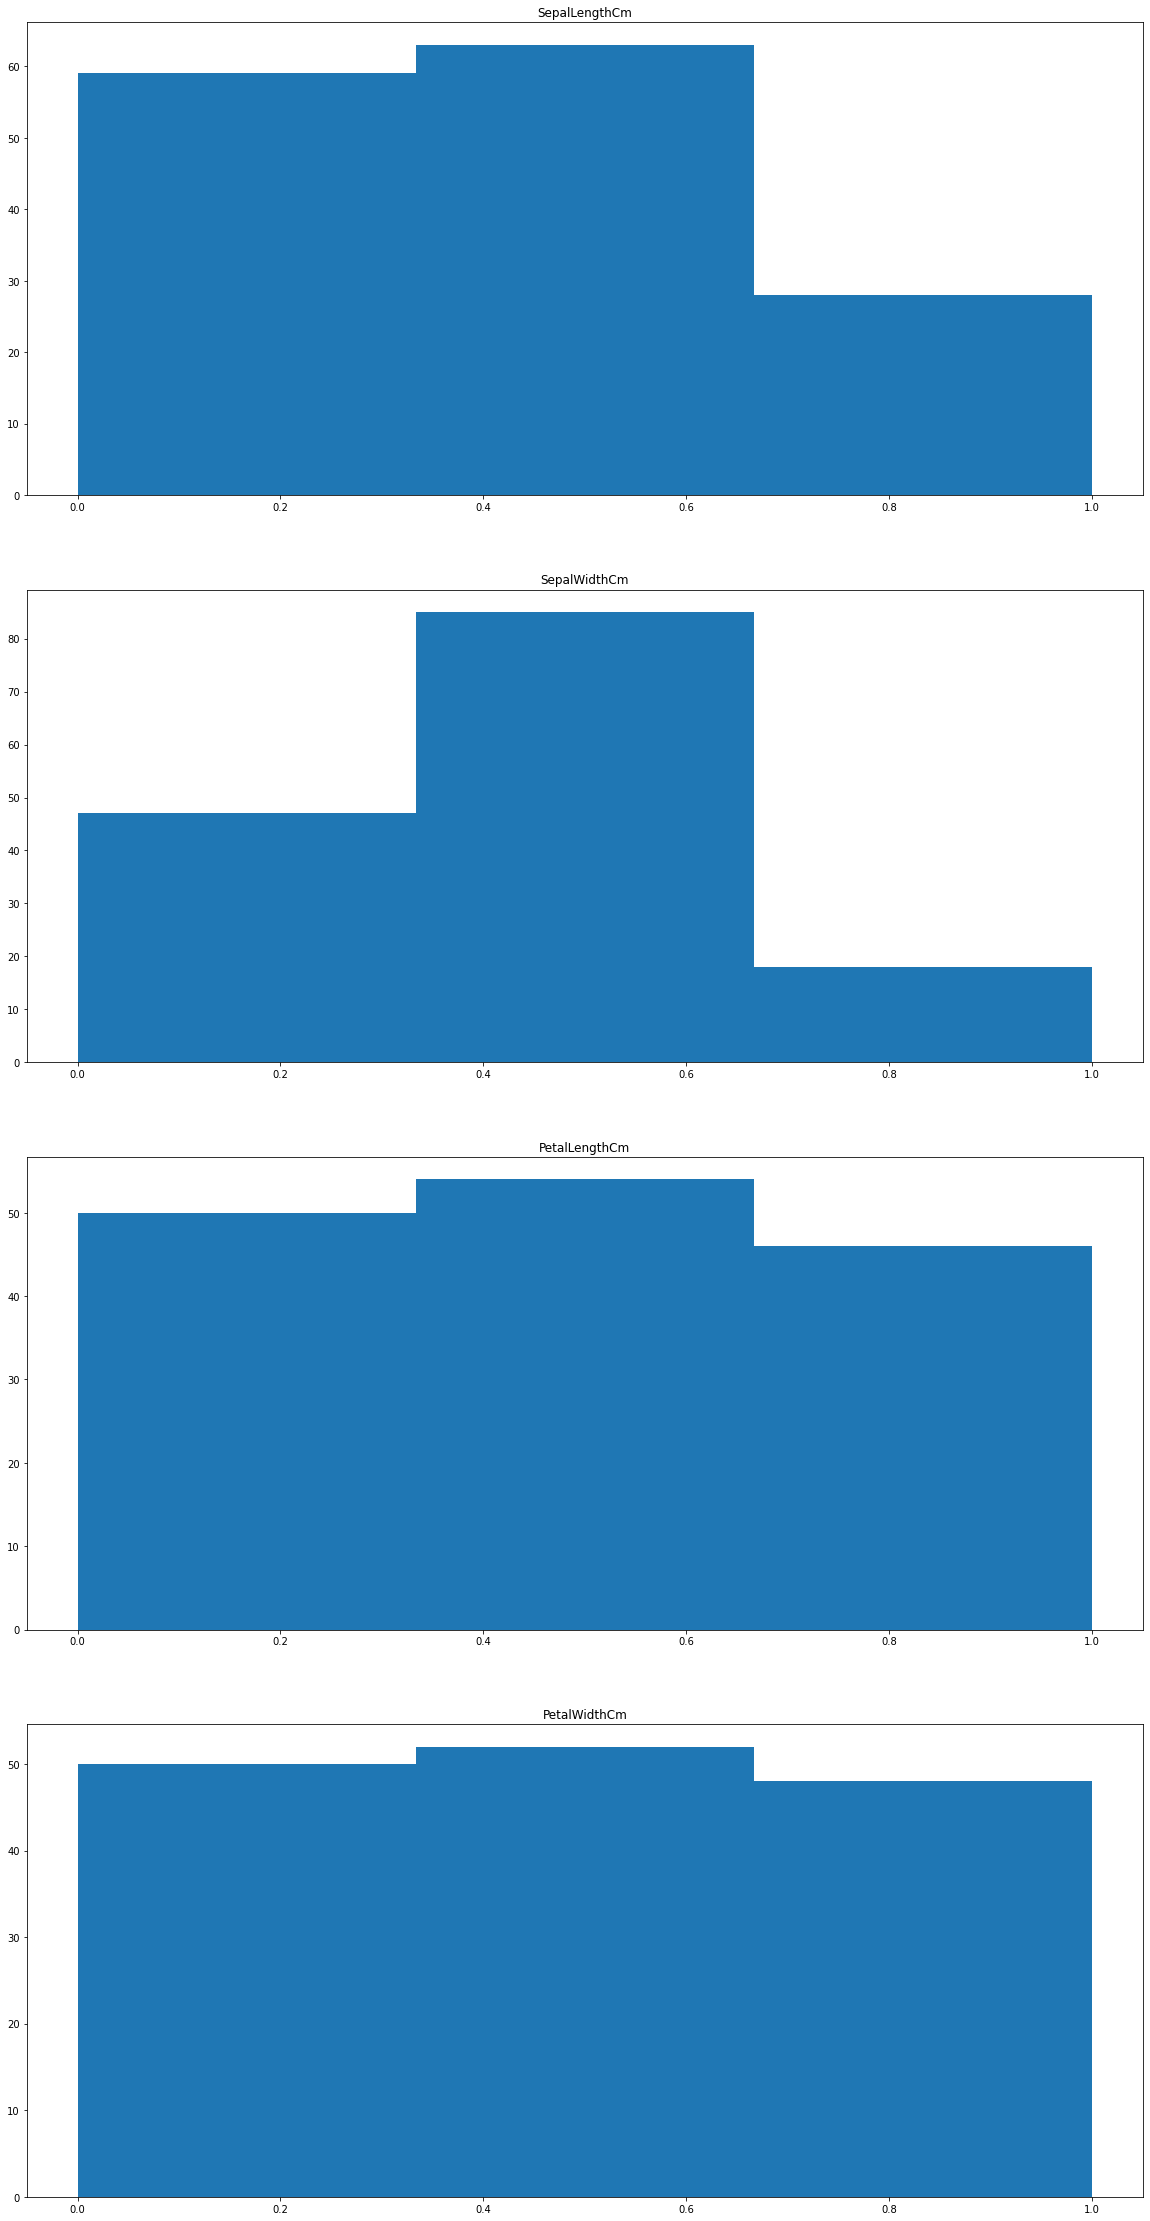

In [9]:
mscaler=MinMaxScaler()
scaledx=mscaler.fit_transform(data)
#scaledx[:,0]

fig2,axes2=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes2):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

In [10]:
#split
from sklearn.model_selection import train_test_split

xtrain,xtest=train_test_split(scaledx,test_size=0.2,random_state=1)
xtrain.shape,xtest.shape

((120, 4), (30, 4))

In [11]:
#modeling

In [12]:
#modeling
from sklearn.cluster import KMeans

model=KMeans()

model.fit(xtrain[:,2:4])
model.labels_,model.inertia_


(array([5, 4, 6, 4, 4, 0, 2, 0, 5, 7, 4, 0, 5, 7, 2, 1, 0, 0, 0, 2, 0, 0,
        1, 4, 1, 4, 3, 5, 1, 2, 0, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 4, 3, 0,
        6, 2, 7, 6, 4, 2, 0, 0, 0, 4, 0, 5, 3, 3, 0, 0, 6, 0, 1, 2, 1, 4,
        2, 4, 4, 2, 0, 2, 0, 6, 5, 0, 5, 0, 0, 4, 3, 4, 0, 0, 3, 0, 3, 0,
        3, 5, 0, 4, 0, 2, 0, 6, 6, 0, 0, 6, 0, 2, 5, 0, 5, 2, 5, 5, 3, 0,
        0, 7, 2, 7, 6, 5, 7, 5, 4, 0]),
 0.39741251339016737)

Text(0, 0.5, 'PetalWidth')

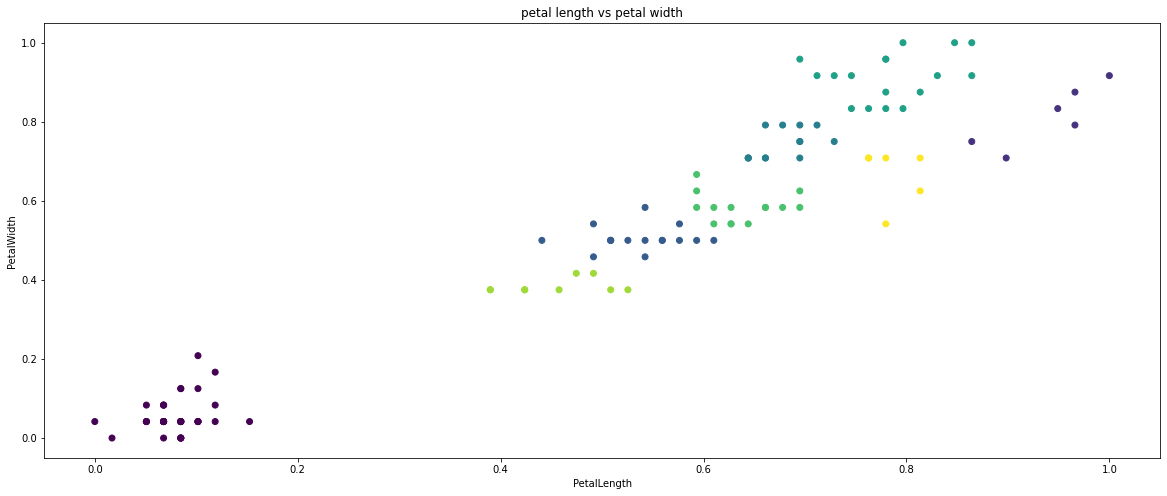

In [13]:
fig3,axes3=plt.subplots(1,1,figsize=(20,8))
axes3.scatter(xtrain[:,2],xtrain[:,3],c=model.labels_)
axes3.set_title('petal length vs petal width')
axes3.set_xlabel('PetalLength')
axes3.set_ylabel('PetalWidth')

Inertia For 2=> 4.3376509918917385
Inertia For 3=> 1.436661112358988
Inertia For 4=> 0.933970774589276
Inertia For 5=> 0.6907934127667892
Inertia For 6=> 0.5443216674942577
Inertia For 7=> 0.45151875935713937
Inertia For 8=> 0.3952088349894444
Inertia For 9=> 0.3284374120735312
Inertia For 10=> 0.2882158688189792
Inertia For 11=> 0.25206799645137584
Inertia For 12=> 0.2285777071753929
Inertia For 13=> 0.21321855816749205
Inertia For 14=> 0.200267207971637


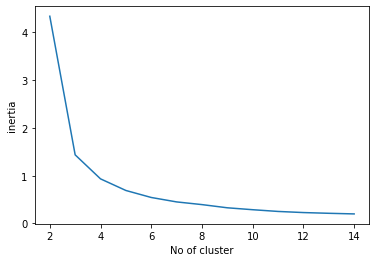

In [14]:
#choosing k value
inertia=[]
for k in range(2,15):
    Model=KMeans(n_clusters=k)

    Model.fit(xtrain[:,2:4])
    print(f'Inertia For {k}=> {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)),inertia)
plt.xlabel('No of cluster')
plt.ylabel('inertia')
plt.show()    

In [2]:
#final model

fmodel=KMeans(n_clusters=3)
fmodel.fit(xtrain[:,2:4])
ypred=fmodel.predict(xtest[:,2:4])
print(ypred)

fig4,axes4=plt.subplots(1,1,figsize=(20,8))

axes4.scatter(xtrain[:,2],xtrain[:,3],c=fmodel.labels_)
axes4.set_title('petal length vs petal width')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')

NameError: name 'KMeans' is not defined